In [21]:
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import codecs
from collections import defaultdict
from bs4 import BeautifulSoup
from sklearn.utils import shuffle
 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [2]:
dataset = pd.read_csv('engReviewsno3.csv')


In [3]:
dataset.shape

(4037798, 3)

In [4]:
stars=dataset['stars']

In [5]:
reviews=dataset['text']

In [6]:
stars.shape,dataset.shape,reviews.shape

((4037798,), (4037798, 3), (4037798,))

In [24]:
#X, Y = dataset.iloc[:,:-1], dataset.iloc[:, -1]
X_tr, X_test, Y_tr, Y_test = train_test_split(reviews,stars, test_size=0.1,shuffle=True, random_state=1)


In [30]:
X_tr=X_tr.iloc[np.random.permutation(len(X_tr))]

In [31]:
print (X_tr[1])

Location is everything and this hotel has it! The reception is inviting and open 24 hours. They are very helpful and have a lot of patience answering all my questions about where to go etc. there is also a lounge open 24 hours with snack-type food. Breakfast is continental-style so if you want heartier fare look elsewhere though you don't have to go far. The bus and train stations are right across the street so it's easy access to the airport or anywhere else you may want to go. Turn uphill to old town or cross the bridge to new town. The room with a view i got was spacious and comfortable though it's a bit of a maze to find it-just follow the signs. The windows are double paned so the room is quiet plus i was on the 5th floor which helps. It's a bit pricey but still one of the best values i found!


In [8]:
X_tr.shape,X_test.shape,Y_tr.shape,Y_test.shape

((3634018,), (403780,), (3634018,), (403780,))

In [9]:
X_train,X_val,Y_train,Y_val =train_test_split(X_tr,Y_tr,test_size=0.1,random_state=1)

In [10]:
X_train.shape,X_val.shape,Y_train.shape,Y_val.shape

((3270616,), (363402,), (3270616,), (363402,))

In [11]:
Y_train.head()

2028202    5
2289893    4
1000508    4
1671779    4
2993581    4
Name: stars, dtype: int64

In [12]:
dataset['text length'] = dataset['text'].apply(len)

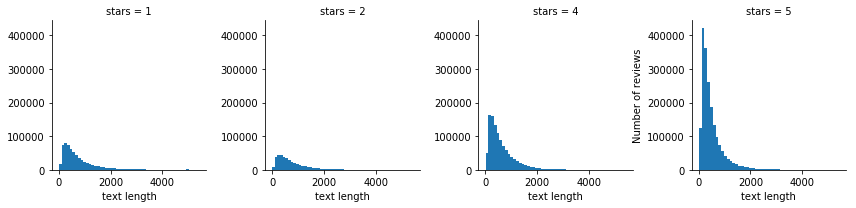

In [13]:
g = sns.FacetGrid(data=dataset, col='stars')
g.map(plt.hist, 'text length', bins=50)
plt.ylabel('Number of reviews')
#plt.savefig('Review length')
plt.show()

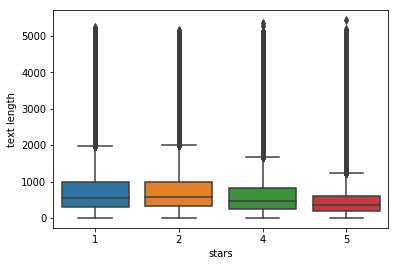

In [14]:
sns.boxplot(x='stars', y='text length', data=dataset)
#plt.savefig('Box plot')
plt.show()

In [15]:
stars = dataset.groupby('stars').mean()
stars.corr()

,Unnamed: 0,text length
Unnamed: 0,1.000000,-0.537126
text length,-0.537126,1.000000


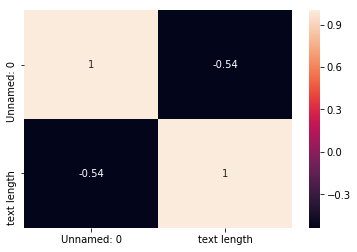

In [16]:
sns.heatmap(data=stars.corr(), annot=True)
plt.savefig('heatmap.png')
plt.show()

In [32]:
s=dataset['stars']
r=dataset['text']

In [18]:
X_train.to_csv(r'training.txt', header=None, index=None, sep=' ', mode='a')

## Toy data

In [33]:
X_trans, X_toy, Y_trans, Y_toy = train_test_split(r,s, test_size=0.05, random_state=1)

In [34]:
Y_toy.shape,X_toy.shape

((201890,), (201890,))

In [35]:
X_toy.to_csv('toydata')

In [36]:
Y_toy.to_csv('toylabel')

In [21]:
import string
from nltk.corpus import stopwords

In [45]:
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [37]:
X_toy.size

201890

In [38]:
from collections import defaultdict

In [39]:
bow = defaultdict(float)

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

In [42]:
toy_data_features = vectorizer.fit_transform(X_toy)

In [43]:
toy_data_features.shape

(201890, 5000)

In [44]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(X_toy[:500])

NameError: name 'text_process' is not defined

In [ ]:
X = bow_transformer.transform(X_toy[:500])

In [32]:
# USING BOW TRANSFORMER AND TEXT PROCESS
xx_train, xx_test, yy_train, yy_test = train_test_split(X, Y_toy[:500], test_size=0.1, random_state=101)

In [33]:
#using toy-DATA EATURES
tx_train, tx_test, ty_train, ty_test = train_test_split(toy_data_features[50000:100000], Y_toy[50000:100000], test_size=0.1, random_state=101)

In [34]:
tx_train.shape,tx_test.shape

((45000, 5000), (5000, 5000))

In [35]:
print (xx_train[0])

  (0, 7319)	1
  (0, 7308)	1
  (0, 7301)	1
  (0, 7149)	1
  (0, 7060)	1
  (0, 6945)	1
  (0, 6912)	1
  (0, 6765)	1
  (0, 6754)	1
  (0, 6469)	1
  (0, 6468)	1
  (0, 6330)	1
  (0, 6288)	2
  (0, 6253)	1
  (0, 6202)	2
  (0, 6074)	1
  (0, 5999)	1
  (0, 5813)	1
  (0, 5811)	2
  (0, 5650)	1
  (0, 5148)	1
  (0, 5059)	1
  (0, 5034)	1
  (0, 4772)	1
  (0, 4710)	2
  (0, 4642)	1
  (0, 4596)	1
  (0, 4463)	1
  (0, 4246)	1
  (0, 4179)	1
  (0, 4148)	1
  (0, 4132)	1
  (0, 4106)	1
  (0, 4095)	1
  (0, 4039)	1
  (0, 3942)	1
  (0, 3635)	1
  (0, 3591)	1
  (0, 2657)	1
  (0, 2316)	2
  (0, 2220)	1
  (0, 2087)	1
  (0, 1013)	1
  (0, 1001)	2
  (0, 405)	1
  (0, 402)	3
  (0, 55)	1


## NAIVE BAYES

In [36]:
nb = MultinomialNB()
nb.fit(xx_train, ty_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [37]:
tx_train.shape

(45000, 5000)

In [38]:
preds = nb.predict(tx_test)

In [39]:
from sklearn.metrics import confusion_matrix, classification_report

In [40]:
print(confusion_matrix(ty_test, preds))

[[ 493  219   37   25]
 [ 106  229  112   17]
 [  42   84  939  309]
 [ 117   25  677 1569]]


In [41]:
print(classification_report(ty_test, preds))

             precision    recall  f1-score   support

          1       0.65      0.64      0.64       774
          2       0.41      0.49      0.45       464
          4       0.53      0.68      0.60      1374
          5       0.82      0.66      0.73      2388

avg / total       0.68      0.65      0.65      5000



## BASELINE ACCURACY

In [42]:
dataset['stars'].value_counts()

5    1930157
4    1089707
1     627685
2     390249
Name: stars, dtype: int64

In [43]:
len(dataset['stars'])

4037798

In [44]:
1930157/4037798

0.47802217941561215

## RANDOM FOREST

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
forest = RandomForestClassifier(n_estimators = 100) 

In [47]:
forest = forest.fit( tx_train, ty_train )

In [48]:
pre=forest.predict(tx_test)

In [49]:
print(classification_report(ty_test, pre))

             precision    recall  f1-score   support

          1       0.72      0.66      0.69       774
          2       0.57      0.03      0.05       464
          4       0.53      0.34      0.42      1374
          5       0.64      0.90      0.75      2388

avg / total       0.61      0.63      0.58      5000



## Perceptron

In [50]:
from sklearn.linear_model import Perceptron

In [51]:
p=Perceptron()

In [52]:
p=p.fit(tx_train,ty_train)

C:\Users\Kailash Nathan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [53]:
pre=p.predict(tx_test)

In [54]:
print(classification_report(ty_test, pre))

             precision    recall  f1-score   support

          1       0.75      0.65      0.70       774
          2       0.32      0.58      0.41       464
          4       0.52      0.53      0.52      1374
          5       0.79      0.69      0.74      2388

avg / total       0.67      0.63      0.64      5000



## Multi-layer Perceptron using Backprop 

In [55]:
from sklearn.neural_network import MLPClassifier

In [56]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)

In [57]:
clf.fit(tx_train, ty_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [58]:
pre=clf.predict(tx_test)

In [59]:
print(classification_report(ty_test, pre))

             precision    recall  f1-score   support

          1       0.73      0.78      0.76       774
          2       0.50      0.43      0.46       464
          4       0.61      0.52      0.56      1374
          5       0.76      0.83      0.79      2388

avg / total       0.69      0.70      0.69      5000

